In [1]:
from adjustText import adjust_text
from scipy.stats import kendalltau, pearsonr
import geopandas as gpd
import json
import libpysal
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns

from epitools import get_data

In [2]:
country = "United States"
location_level = "state"
method = "nv"
year = 2020

In [3]:
gdf = gpd.read_file(f"geo_shapes/composite_us_states.geojson")
gdf = gdf.rename(columns={"name": "state"})
gdf["state"] = gdf["state"].str.upper()
gdf.head()

,geo_id,fips_state,state,lsad,census_area,iso_3166_2,census,pop_estimataes_base,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,geometry
0,0400000US04,04,ARIZONA,,113594.084,AZ,6392017,6392310,6411999,6472867,6556236,6634997,6731484,"MULTIPOLYGON (((-112.53859 37.00067, -112.5345..."
1,0400000US05,05,ARKANSAS,,52035.477,AR,2915918,2915958,2922297,2938430,2949300,2958765,2966369,"MULTIPOLYGON (((-94.04296 33.01922, -94.04304 ..."
2,0400000US06,06,CALIFORNIA,,155779.220,CA,37253956,37254503,37336011,37701901,38062780,38431393,38802500,"MULTIPOLYGON (((-120.24848 33.99933, -120.2473..."
3,0400000US08,08,COLORADO,,103641.888,CO,5029196,5029324,5048575,5119661,5191709,5272086,5355866,"MULTIPOLYGON (((-107.31779 41.00296, -107.0006..."
4,0400000US09,09,CONNECTICUT,,4842.355,CT,3574097,3574096,3579345,3590537,3594362,3599341,3596677,"MULTIPOLYGON (((-72.39743 42.03330, -72.19883 ..."


In [4]:
df = pd.read_csv(f"data_output/{country}/{year}_divisiveness_{location_level}_{method}.csv.gz", compression="gzip")
df = df.dropna()
df["rank"] = df.groupby(location_level)["value"].rank(ascending=False).astype(int)
df.head()

,candidate,value,weight,type,mean,state,rank
0,DONALD J TRUMP,0.60498,0.629114,Between,0.629114,ALABAMA,2
1,DONALD J TRUMP,0.28142,0.629114,Within,0.629114,ALABAMA,3
2,JOSEPH R BIDEN JR,0.72535,0.370886,Between,0.370886,ALABAMA,1
3,JOSEPH R BIDEN JR,0.28142,0.370886,Within,0.370886,ALABAMA,3
4,DONALD J TRUMP,0.74623,0.552618,Between,0.552618,ALASKA,2


In [5]:
df_location = pd.read_csv(f"data_output/{country}/{year}_first_round_location.csv.gz", compression="gzip")
df_location["state_po"] = df_location["state_po"].str[0:2]
df_location.head()

,polling_id,state,state_po,county_name,county_fips
0,AL-1001,ALABAMA,AL,AUTAUGA,1001
1,AL-1003,ALABAMA,AL,BALDWIN,1003
2,AL-1005,ALABAMA,AL,BARBOUR,1005
3,AL-1007,ALABAMA,AL,BIBB,1007
4,AL-1009,ALABAMA,AL,BLOUNT,1009


In [6]:
def create_geoplot(data, ax, title, char=""):
    data = gpd.GeoDataFrame(data)
    plot = data.plot(
        column="candidate",
        color=data["color"],
        edgecolor="black",
        lw=0.2,
        ax=ax, 
        legend=True, 
        legend_kwds=dict()
    )
    plot.axis("off")

    ax.set_title(title)
    ax.text(.01, .99, char, weight="bold", fontsize=16, ha="left", va="top", transform=ax.transAxes)
    return plot

In [7]:
output = []

for year in [2000, 2004, 2008, 2012, 2016, 2020]:
    df_tmp = get_data(
        country="United States",
        aggregation="state",
        election="first_round",
        year=year
    )
    output.append(df_tmp)

df_dv = pd.concat(output, ignore_index=True)
df_dv["state"] = df_dv["state"].str.upper()

df_dv.head()

,state,epi,epi_between,epi_within,year
0,ALABAMA,0.954538,0.812398,0.142140,2000
1,ALASKA,0.791327,0.648163,0.143164,2000
2,ARIZONA,0.969194,0.886976,0.082218,2000
3,ARKANSAS,0.992210,0.842943,0.149267,2000
4,CALIFORNIA,0.997502,0.782541,0.214961,2000


In [8]:
# dt = pd.read_csv(f"data_output/United States/{2000}_divisiveness_state_{method}.csv.gz")
# dt[dt["state"] == "FLORIDA"]

In [9]:
df_dv[df_dv["state"] == "FLORIDA"].sort_values("year", ascending=True).head(50)

,state,epi,epi_between,epi_within,year
9,FLORIDA,0.999998,0.843075,0.156924,2000
60,FLORIDA,0.996833,0.833695,0.163138,2004
111,FLORIDA,0.998283,0.832906,0.165377,2008
162,FLORIDA,0.999975,0.812676,0.187298,2012
213,FLORIDA,0.998440,0.774788,0.223653,2016
264,FLORIDA,1.004032,0.818298,0.185734,2020


C:\Users\cnava\AppData\Roaming\Python\Python310\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 1, 11.
  warnings.warn(message)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')


C:\Users\cnava\AppData\Roaming\Python\Python310\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 1, 11.
  warnings.warn(message)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')


C:\Users\cnava\AppData\Roaming\Python\Python310\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 1, 11.
  warnings.warn(message)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')


C:\Users\cnava\AppData\Roaming\Python\Python310\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 1, 11.
  warnings.warn(message)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')


C:\Users\cnava\AppData\Roaming\Python\Python310\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 1, 11.
  warnings.warn(message)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')


C:\Users\cnava\AppData\Roaming\Python\Python310\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 1, 11.
  warnings.warn(message)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')


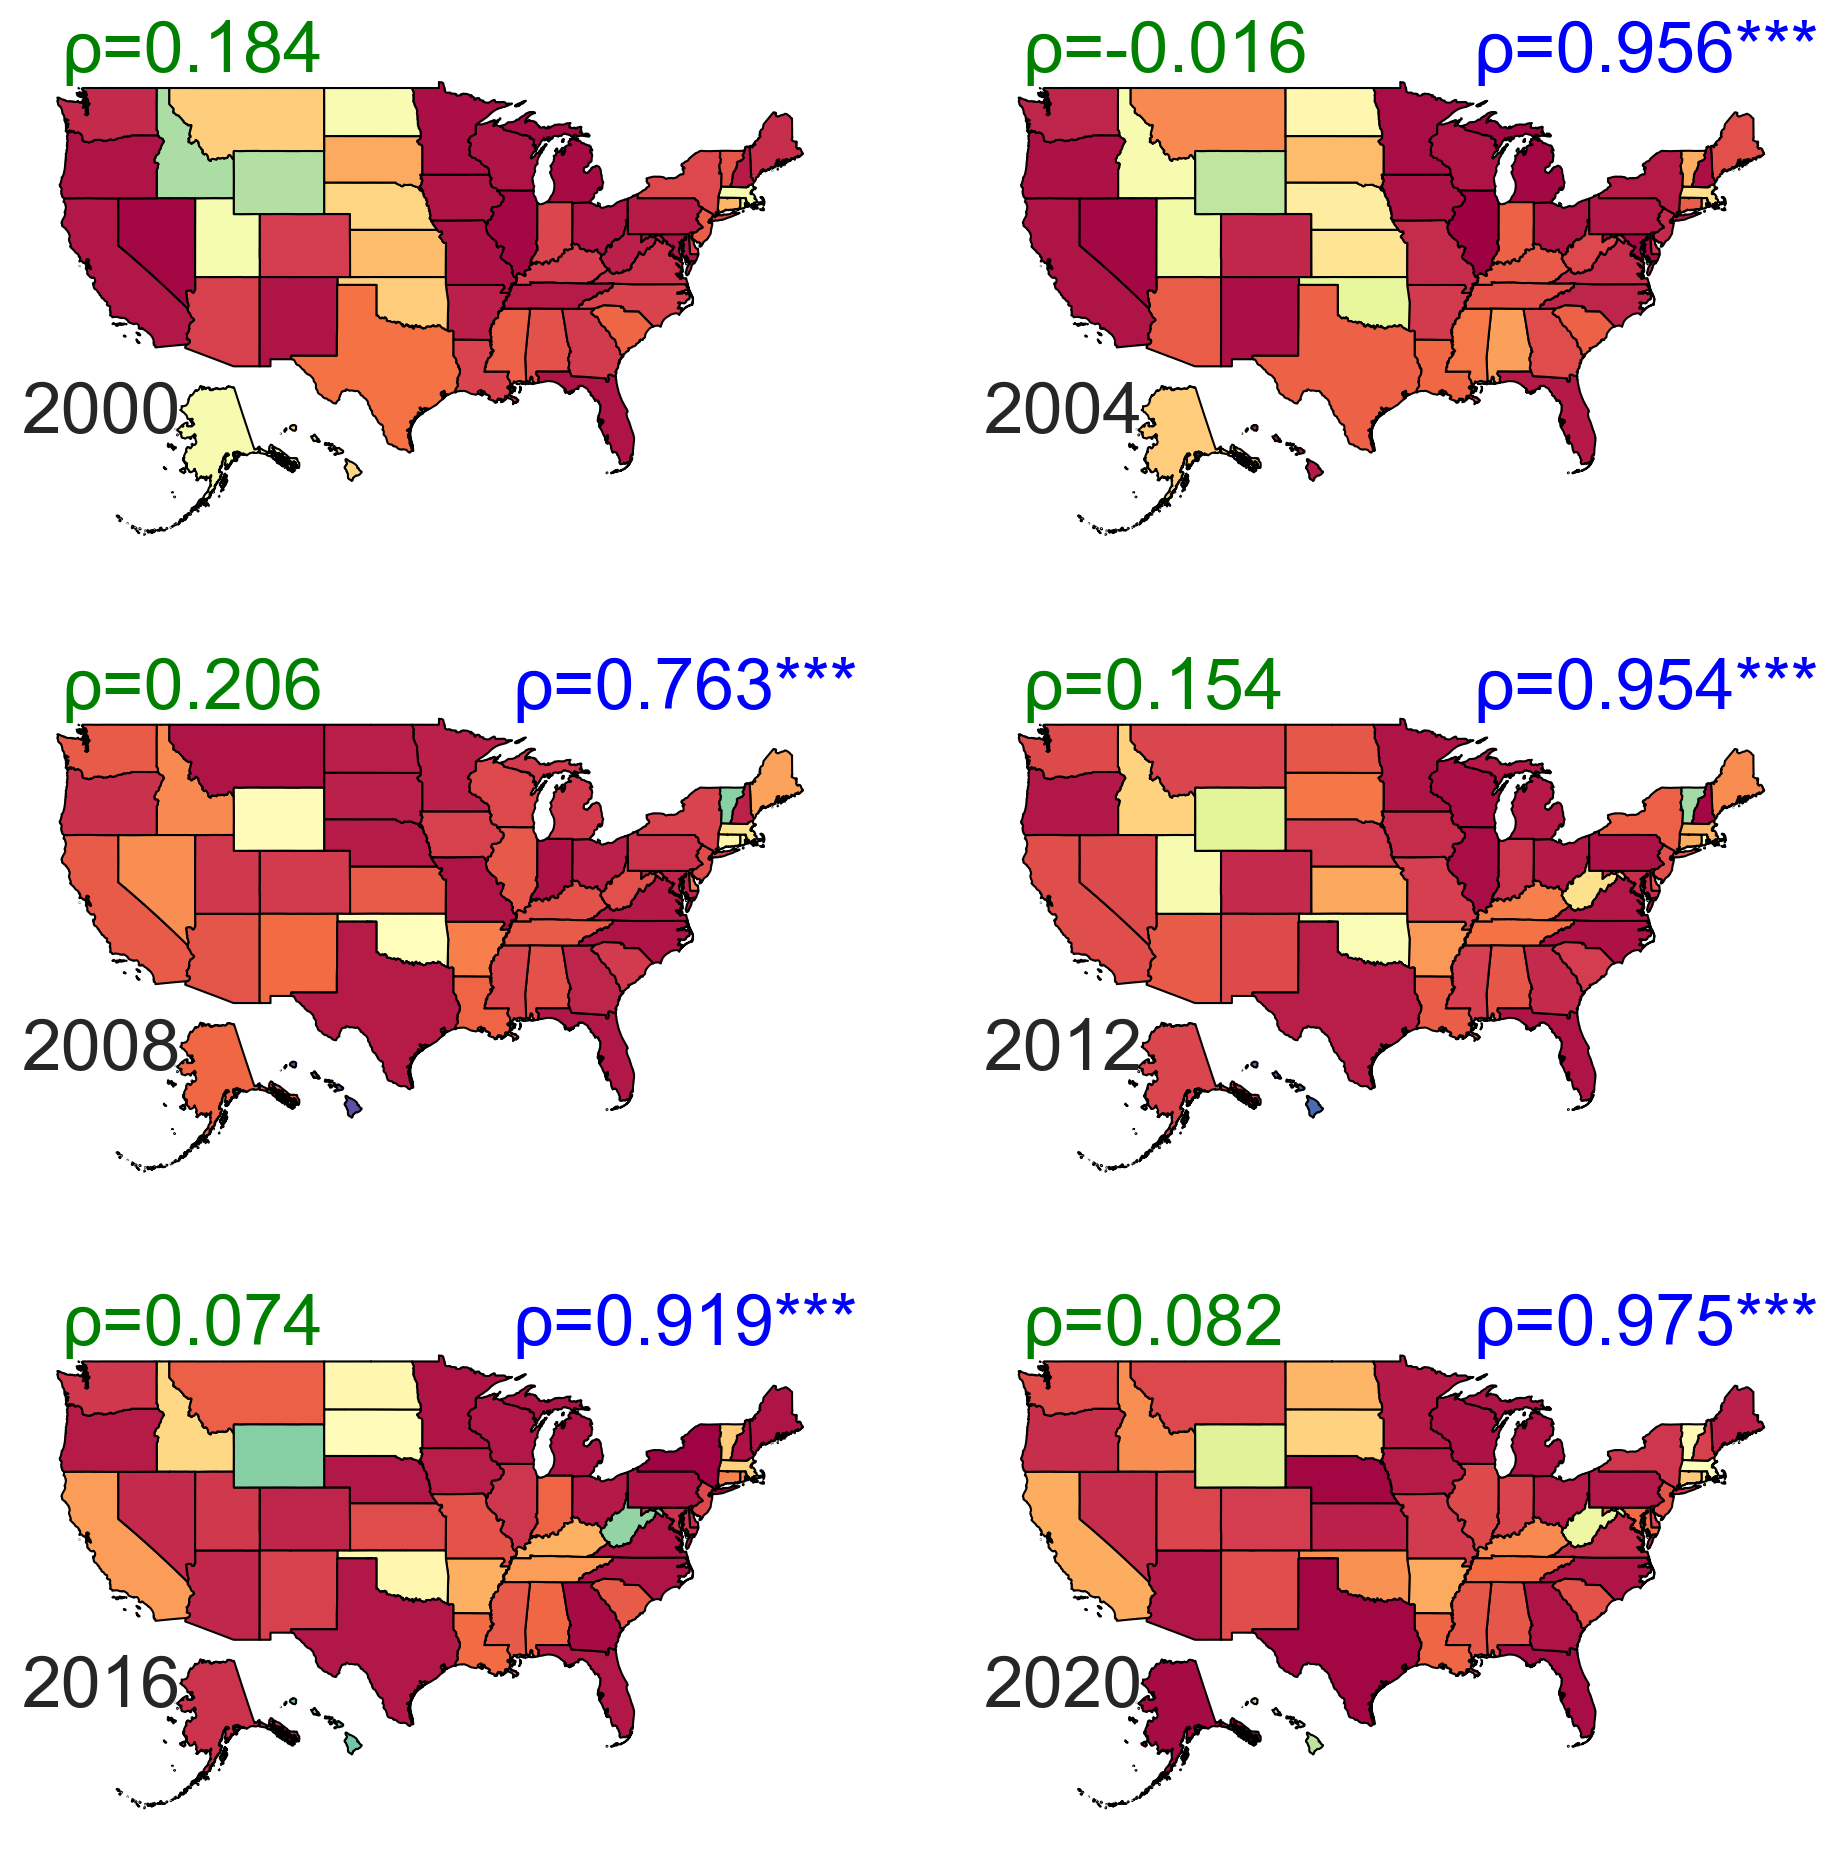

In [20]:
sns.set(font_scale=2.15)
measure_name = "epi"

dd = df_dv.pivot(index="state", columns="year", values=measure_name).reset_index()

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), dpi=200)
def set_corr(corr, _):
    corr = round(corr, 3)
    if _ < 0.01:
        return f"ρ={corr}***"
    elif _ < 0.05:
        return f"ρ={corr}**"
    elif _ < 0.1:
        return f"ρ={corr}*"
    return f"ρ={corr}"

i = 0
for year, data_tmp in df_dv.groupby("year"):
    # data_tmp = data_tmp.groupby("state").agg({"value": "mean"}).reset_index()
    data = pd.merge(data_tmp, gdf, on=location_level)

    data = gpd.GeoDataFrame(data).dropna()
    W = libpysal.weights.Queen.from_dataframe(data)
    W.transform = "r"
    data["sp_value"] = libpysal.weights.lag_spatial(W, data[measure_name])

    ax = axs[int(i/2), i%2]
    i += 1

    data.plot(
        column=measure_name,
        edgecolor="black",
        vmin=df_dv[df_dv["state"] != "DISTRICT OF COLUMBIA"][measure_name].min(),
        vmax=df_dv[df_dv["state"] != "DISTRICT OF COLUMBIA"][measure_name].max(),
        lw=0.75,
        ax=ax, 
        cmap="Spectral_r",
        legend=False, 
        legend_kwds=dict(
            shrink=0.1,
            # labelsize=10
            # fontsize=14
        )
    )

    corr, _ = pearsonr(data[measure_name], data["sp_value"])
    ax.text(0.05, 0.975, set_corr(corr, _), color="green", transform=ax.transAxes)

    if year > 2000:
        tmp = dd[[year - 4, year]].copy().dropna()
        corr, _ = pearsonr(tmp[year - 4], tmp[year])
        ax.text(0.6, 0.975, set_corr(corr, _), color="blue", transform=ax.transAxes)

    ax.axis("off")
    ax.text(0.0025, 0.25, year, transform=ax.transAxes)

fig.tight_layout()

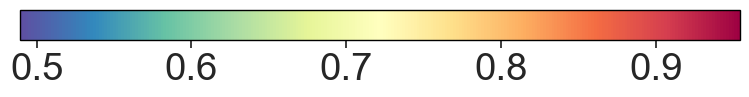

In [23]:
import pylab as pl
import numpy as np

measure_name = "epi_between"
sns.set(font_scale=2.5)

a = np.array([[df_dv[df_dv["state"] != "DISTRICT OF COLUMBIA"][measure_name].min(), df_dv[df_dv["state"] != "DISTRICT OF COLUMBIA"][measure_name].max()]])
pl.figure(figsize=(9, 1.5))
img = pl.imshow(a, cmap="Spectral_r")
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.2])

cb = pl.colorbar(orientation="horizontal", cax=cax)
# cb.ax.set_xticklabels(["<0.2", "0.25", "0.3", "0.35", "0.4+"])
cb.outline.set_color("#000000")
cb.outline.set_linewidth(1)

In [16]:
df_dv[df_dv["year"] == 2020].sort_values("epi_between", ascending=False)

,state,epi,epi_between,epi_within,year
284,NEW HAMPSHIRE,0.969321,0.912718,0.056603,2020
257,ARIZONA,0.998104,0.895863,0.102241,2020
283,NEVADA,0.981795,0.874958,0.106837,2020
274,MAINE,0.992307,0.831130,0.161177,2020
264,FLORIDA,1.004032,0.818298,0.185734,2020
294,RHODE ISLAND,0.841630,0.789310,0.052319,2020
261,CONNECTICUT,0.865559,0.788837,0.076721,2020
277,MICHIGAN,0.999709,0.785058,0.214651,2020
270,IOWA,0.994332,0.784109,0.210223,2020
256,ALASKA,1.006061,0.775633,0.230428,2020


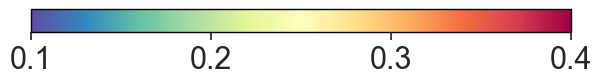

In [17]:
import pylab as pl
import numpy as np

a = np.array([[0.1, 0.4]])
pl.figure(figsize=(9, 1.5))
img = pl.imshow(a, cmap="Spectral_r")
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.6, 0.15])

cb = pl.colorbar(orientation="horizontal", cax=cax)
cb.outline.set_color("#000000")
cb.outline.set_linewidth(1)

In [18]:
df_turnout = pd.read_excel(
    "data_external/United States/turnout_2020.xlsx",
    sheet_name="Data",
    header=3,
)
df_turnout = df_turnout.dropna(how="all", axis=0).dropna(how="all", axis=1)
df_turnout.columns = ["state", "turnout", "desc"]
df_turnout = df_turnout[df_turnout["state"] != "United States"]
df_turnout["state"] = df_turnout["state"].str.upper()
df_turnout["turnout"] = df_turnout["turnout"] / 100
df_turnout.head()

,state,turnout,desc
2,MINNESOTA,0.800,in %
3,COLORADO,0.764,in %
4,MAINE,0.763,in %
5,WISCONSIN,0.758,in %
6,WASHINGTON,0.757,in %


In [19]:
dd = pd.merge(
    df_dv[df_dv["year"] == 2020],
    df_turnout,
    on="state"
)

dd = pd.merge(
    dd,
    df_location[["state", "state_po"]].drop_duplicates(),
    on="state"
)

ValueError: Could not interpret value `value` for parameter `x`

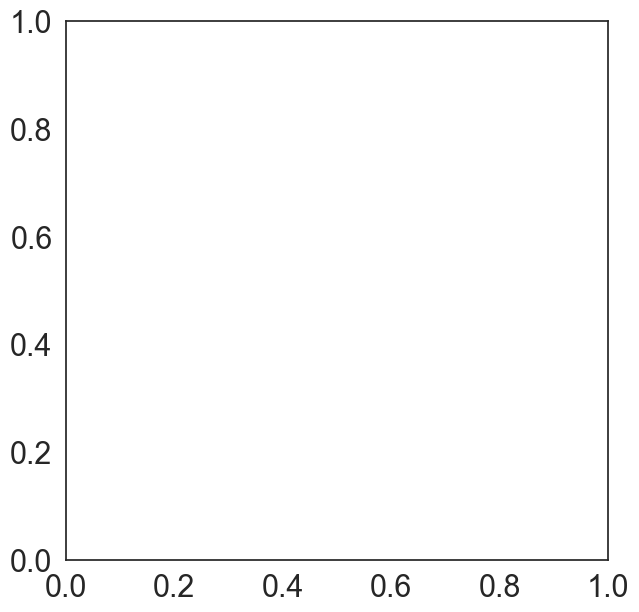

In [20]:
sns.set_style("whitegrid")
sns.set(font_scale=2, style="white")

fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x="value", y="turnout", color="blue", data=dd)
ax.set_xlabel("Election Polarization")
ax.set_ylabel("Voter Turnout in Federal Election (%)")

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

# for x, item in dd.iterrows():
#     ax.text(item["value"], item["turnout"], item["state_po"])
sns.despine()

colors = []
texts = []
for x, item in dd.iterrows():
    color = "#222222"# "#95B0B6"
    colors.append({"arrowstyle": "-", "color": "red"})
    txt = ax.annotate(
        item["state_po"], 
        xy=(item["value"], item["turnout"]), 
        fontsize=20, 
        color=color, 
        arrowprops=dict(arrowstyle="-", color="#BBBBBB")
    )
    texts.append(txt)

adjust_text(texts, lim=200, ax=ax) 

def set_corr(corr, _):
    corr = round(corr, 3)
    if _ < 0.01:
        return f"ρ = {corr}***"
    elif _ < 0.05:
        return f"ρ = {corr}**"
    elif _ < 0.1:
        return f"ρ = {corr}*"

    return f"ρ = {corr}"
corr, _ = pearsonr(dd["value"], dd["turnout"])
ax.text(0.05, 0.05, set_corr(corr, _), color="red", transform=ax.transAxes)

In [ ]:
df_vaccination = pd.read_csv("https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/us_state_vaccinations.csv")
df_vaccination = df_vaccination.dropna()
df_vaccination = df_vaccination.groupby("location").agg({"people_fully_vaccinated_per_hundred": "max"})
df_vaccination = df_vaccination.reset_index()
df_vaccination = df_vaccination.rename(columns={"location": "state"})
df_vaccination["state"] = df_vaccination["state"].str.upper()
df_vaccination["people_fully_vaccinated_per_hundred"] = df_vaccination["people_fully_vaccinated_per_hundred"] / 100
df_vaccination.head()

,state,people_fully_vaccinated_per_hundred
0,ALABAMA,0.5154
1,ALASKA,0.6267
2,AMERICAN SAMOA,0.8842
3,ARIZONA,0.6227
4,ARKANSAS,0.5493


KeyboardInterrupt: 

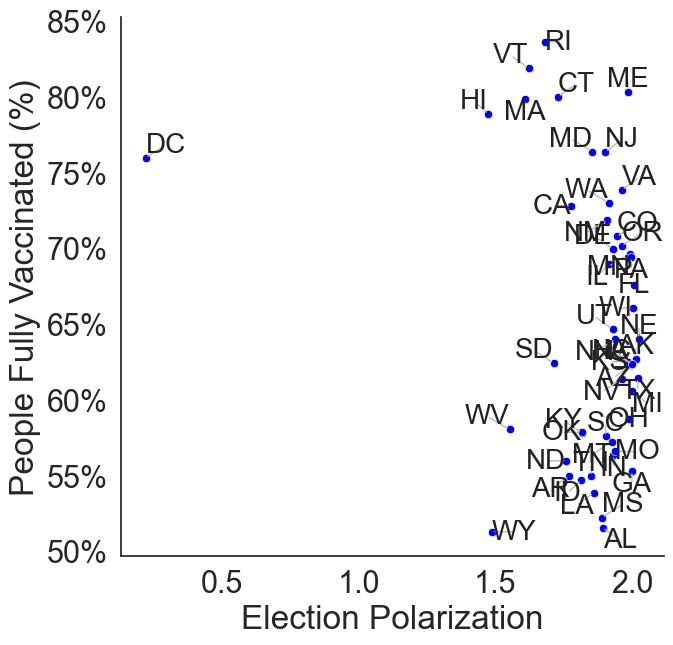

In [ ]:
dd = pd.merge(
    df_dv[df_dv["year"] == 2020],
    df_vaccination,
    on="state"
)

dd = pd.merge(
    dd,
    df_location[["state", "state_po"]].drop_duplicates(),
    on="state"
)

sns.set_style("whitegrid")
sns.set(font_scale=2, style="white")

x_value = "value"
y_value = "people_fully_vaccinated_per_hundred"

fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x=x_value, y=y_value, color="blue", data=dd)
ax.set_xlabel("Election Polarization")
ax.set_ylabel("People Fully Vaccinated (%)")

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

# for x, item in dd.iterrows():
#     ax.text(item["value"], item["turnout"], item["state_po"])
sns.despine()

colors = []
texts = []
for x, item in dd.iterrows():
    color = "#222222"# "#95B0B6"
    colors.append({"arrowstyle": "-", "color": "red"})
    txt = ax.annotate(
        item["state_po"], 
        xy=(item[x_value], item[y_value]), 
        fontsize=20, 
        color=color, 
        arrowprops=dict(arrowstyle="-", color="#BBBBBB")
    )
    texts.append(txt)

adjust_text(texts, lim=200, ax=ax) 

def set_corr(corr, _):
    corr = round(corr, 3)
    if _ < 0.01:
        return f"ρ = {corr}***"
    elif _ < 0.05:
        return f"ρ = {corr}**"
    elif _ < 0.1:
        return f"ρ = {corr}*"

    return f"ρ = {corr}"
corr, _ = pearsonr(dd[x_value], dd[y_value])
ax.text(0.05, 0.05, set_corr(corr, _), color="red", transform=ax.transAxes)

In [ ]:
from urllib.parse import quote
import requests

API = "https://xenops-api.datausa.io/api/data?Geography=01000US:children&measure=Household Income by Race,Household Income by Race Moe&drilldowns=Year,Race&Race=0"

r = requests.get(API)
df_income = pd.DataFrame(r.json()["data"])
df_income = df_income.rename(columns={"State": "state", "ID Year": "year", "Household Income by Race": "household_income"})
df_income["state"] = df_income["state"].str.upper()
df_income = df_income[["year", "state", "household_income"]]
df_income.head()


,year,state,household_income
0,2020,ALABAMA,52035
1,2020,ALASKA,77790
2,2020,ARIZONA,61529
3,2020,ARKANSAS,49475
4,2020,CALIFORNIA,78672


ValueError: Could not interpret value `Household Income by Race` for parameter `y`

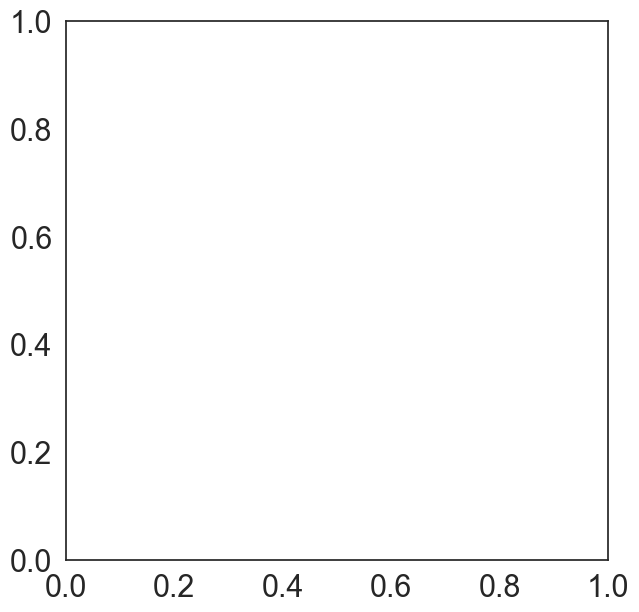

In [ ]:
dd = pd.merge(
    df_dv[df_dv["year"] == 2016],
    df_income,
    on="state"
)

dd = pd.merge(
    dd,
    df_location[["state", "state_po"]].drop_duplicates(),
    on="state"
)

sns.set_style("whitegrid")
sns.set(font_scale=2, style="white")

x_value = "value"
y_value = "Household Income by Race"

fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x=x_value, y=y_value, color="blue", data=dd)
ax.set_xlabel("Election Polarization")
ax.set_ylabel("Household Income (USD)")

# ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

# for x, item in dd.iterrows():
#     ax.text(item["value"], item["turnout"], item["state_po"])
sns.despine()

colors = []
texts = []
for x, item in dd.iterrows():
    color = "#222222"# "#95B0B6"
    colors.append({"arrowstyle": "-", "color": "red"})
    txt = ax.annotate(
        item["state_po"], 
        xy=(item[x_value], item[y_value]), 
        fontsize=20, 
        color=color, 
        arrowprops=dict(arrowstyle="-", color="#BBBBBB")
    )
    texts.append(txt)

adjust_text(texts, lim=200, ax=ax) 

def set_corr(corr, _):
    corr = round(corr, 3)
    if _ < 0.01:
        return f"ρ = {corr}***"
    elif _ < 0.05:
        return f"ρ = {corr}**"
    elif _ < 0.1:
        return f"ρ = {corr}*"

    return f"ρ = {corr}"
corr, _ = pearsonr(dd[x_value], dd[y_value])
ax.text(0.05, 0.05, set_corr(corr, _), color="red", transform=ax.transAxes)

In [ ]:
API_DATA = "https://vibranium-api.datausa.io/cubes/acs_ygpsar_poverty_by_gender_age_race_5/aggregate.jsonrecords?drilldown[]=[Year].[Year]&drilldown[]=[Geography].[State].[State]&measures[]=Poverty+Rate&order=[Measures].[Poverty+Rate]&order_desc=true&nonempty=true&parents=true&sparse=true"
r = requests.get(API_DATA).json()["data"]

df_poverty = pd.DataFrame(r)
df_poverty = df_poverty.rename(columns={"State": "state", "ID Year": "year", "Poverty Rate": "poverty_rate"})
df_poverty["state"] = df_poverty["state"].str.upper()
df_poverty = df_poverty[["year", "state", "poverty_rate"]]
df_poverty.head()

,year,state,poverty_rate
0,2015,PUERTO RICO,0.455253
1,2014,PUERTO RICO,0.452463
2,2016,PUERTO RICO,0.451014
3,2013,PUERTO RICO,0.450716
4,2017,PUERTO RICO,0.448992


In [ ]:
API_DATA = "https://vibranium-api.datausa.io/cubes/acs_yg_gini_5/aggregate.jsonrecords?drilldown[]=[Year].[Year]&drilldown[]=[Geography].[State].[State]&measures[]=Wage+GINI&order=[Measures].[Wage+GINI]&order_desc=true&nonempty=true&parents=true&sparse=true"
r = requests.get(API_DATA).json()["data"]

df_inequality = pd.DataFrame(r)
df_inequality = df_inequality.rename(columns={"State": "state", "ID Year": "year", "Wage GINI": "gini"})
df_inequality["state"] = df_inequality["state"].str.upper()
df_inequality = df_inequality[["year", "state", "gini"]]
df_inequality.head()

,year,state,gini
0,2017,PUERTO RICO,0.5492
1,2019,PUERTO RICO,0.5486
2,2018,PUERTO RICO,0.5475
3,2016,PUERTO RICO,0.5457
4,2020,PUERTO RICO,0.5448


In [ ]:
data = pd.merge(
    df_poverty,
    df_dv,
    on=["state", "year"]
)

data = pd.merge(
    data,
    df_income,
    on=["state", "year"]
)

data = pd.merge(
    data,
    df_inequality,
    on=["state", "year"]
)

data = data.rename(columns={"Poverty Rate": "poverty_rate"})
data_corr = data.copy()
values = ["poverty_rate", "value", "household_income", "gini"]
data = data.pivot(index="state", columns=["year"], values=values)

year_pair = (2016, 2020)
for column in values:
    data[f"diff_{column}"] = (data[(column, year_pair[1])] - data[(column, year_pair[0])]) / data[(column, year_pair[0])]
data.to_csv("test_usa.csv", index=False)
data.head()

poverty_rate               value           household_income  \
year               2016      2020      2016      2020             2016   
state                                                                    
ALABAMA        0.184016  0.159829  0.586357  0.561159          44758.0   
ALASKA         0.101279  0.103370  0.377823  0.369978          74444.0   
ARIZONA        0.177323  0.141242  0.415696  0.428290          51340.0   
ARKANSAS       0.188252  0.160827  0.440118  0.438991          42336.0   
CALIFORNIA     0.158369  0.125770  0.397230  0.409927          63783.0   

                       gini         diff_poverty_rate diff_value  \
year           2020    2016    2020                                
state                                                              
ALABAMA     52035.0  0.4769  0.4777         -0.131442  -0.042975   
ALASKA      77790.0  0.4174  0.4230          0.020647  -0.020762   
ARIZONA     61529.0  0.4682  0.4661         -0.203477   0.030298   
ARKANSAS    49475.0  0.4708  0.4792         -0.145686  -0.002560   
CALIFORNIA  78672.0  0.4880  0.4874         -0.205843   0.031965   

           diff_household_income diff_gini  
year                                        
state                                       
ALABAMA                 0.162585  0.001678  
ALASKA                  0.044947  0.013416  
ARIZONA                 0.198461 -0.004485  
ARKANSAS                0.168627  0.017842  
CALIFORNIA              0.233432 -0.001230

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Poverty Rate (%)'),
  Text(0, 1.5, 'Voter Turnout (%)'),
  Text(0, 2.5, 'Household Income')])

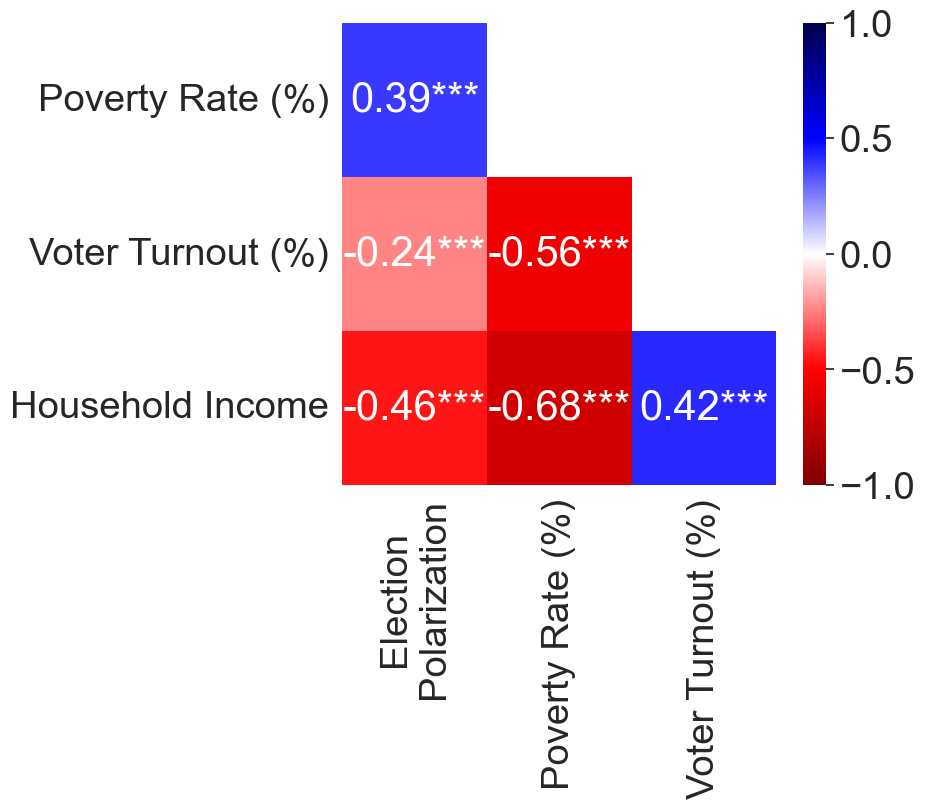

In [ ]:
sns.set_style("whitegrid")
sns.set(font_scale=2.5, style="whitegrid")
matplotlib.rc("axes", edgecolor="#000000")
matplotlib.rcParams['axes.grid'] = True

items = {
    "value": "Election\nPolarization",
    "Poverty Rate": "Poverty Rate (%)",
    "turnout": "Voter Turnout (%)",
    "Household Income by Race": "Household Income"
}
dd = data.rename(columns=items)[items.values()]


corr_m = dd.corr()
rho = dd.corr()
pval = dd.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)

p = pval.applymap(lambda x: "".join(["*" for t in [0.01, 0.05, 0.1] if x<=t]))
p = rho.round(2).astype(str) + p

p = np.tril(p.values, k=-1)

p[p==0] = np.nan
p = pd.DataFrame(p).dropna(axis=0, how="all").dropna(axis=1, how="all")

labels_m = list(corr_m)
corr_m = np.tril(corr_m.values, k=-1)

corr_m[corr_m==0] = np.nan

fig, ax = plt.subplots(figsize=(7, 6))

heatmap_data = pd.DataFrame(corr_m, index=labels_m, columns=labels_m).round(2)\
                .dropna(axis=0, how="all")\
                .dropna(axis=1, how="all")

g = sns.heatmap(heatmap_data, vmin=-1, vmax=1, annot=p, ax=ax, cmap="seismic_r", fmt="", cbar=True)

g.set_ylim(heatmap_data.shape[0], 0)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

In [ ]:
# https://data.census.gov/cedsci/table?q=urban%20areas%20by%20state&tid=DECENNIALCD1132010.H2&tp=true
df_rurality = pd.read_csv("data_external/United States/DECENNIALCD1132010.H2-2022-11-02T160811.csv").dropna()
df_rurality = df_rurality.rename(columns={
    "Label (Grouping)": "state",
    "Total:!!Urban:": "urban",
    "Total:!!Rural": "rural"
})
df_rurality["state"] = df_rurality["state"].str.upper().str.replace(u"\xa0", "")
for col in ["urban", "rural"]:
    df_rurality[col] = df_rurality[col].str.replace(u"\u202f", "").astype(int)
df_rurality["rurality"] = df_rurality["rural"] / (df_rurality["urban"] + df_rurality["rural"])
df_rurality.head()


In [ ]:
year = 2020

data = pd.merge(
    df_poverty[df_poverty["year"] == year],
    df_dv[df_dv["year"] == year],
    on="state"
)

data = pd.merge(
    data,
    df_turnout,
    on="state"
)

data = pd.merge(
    data,
    df_inequality[df_inequality["year"] == year],
    on="state"
)

data = pd.merge(
    data,
    df_income[df_income["year"] == year],
    on="state"
)

data = pd.merge(
    data,
    df_rurality,
    on="state"
)
data.head()

C:\Users\cnava\AppData\Local\Temp\ipykernel_23448\2515367767.py:21: FutureWarning: Passing 'suffixes' which cause duplicate columns {'year_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = pd.merge(


,year_x,state,poverty_rate,value,year_y,turnout,desc,year_x,gini,year_y,household_income,Total:,urban,Total:!!Urban:!!Inside urbanized areas,Total:!!Urban:!!Inside urban clusters,rural,Total:!!Not defined for this file,rurality
0,2020,MISSISSIPPI,0.195777,0.588894,2020,0.602,in %,2020,0.4838,2020,46511,1 274 719,626138,352 526,273 612,648581,0.0,0.508803
1,2020,LOUISIANA,0.186495,0.617496,2020,0.646,in %,2020,0.4991,2020,50800,1 964 981,1435286,1 211 651,223 635,529695,0.0,0.269567
2,2020,NEW MEXICO,0.185513,0.390786,2020,0.613,in %,2020,0.4742,2020,51243,901 388 (r23120),677019,467 906,209 113,224369,0.0,0.248915
3,2020,WEST VIRGINIA,0.170969,0.283488,2020,0.576,in %,2020,0.4661,2020,48037,881 917,424443,289 445,134 998,457474,0.0,0.518727
4,2020,KENTUCKY,0.166069,0.492971,2020,0.649,in %,2020,0.4776,2020,52238,1 927 164,1117530,779 669,337 861,809634,0.0,0.420117


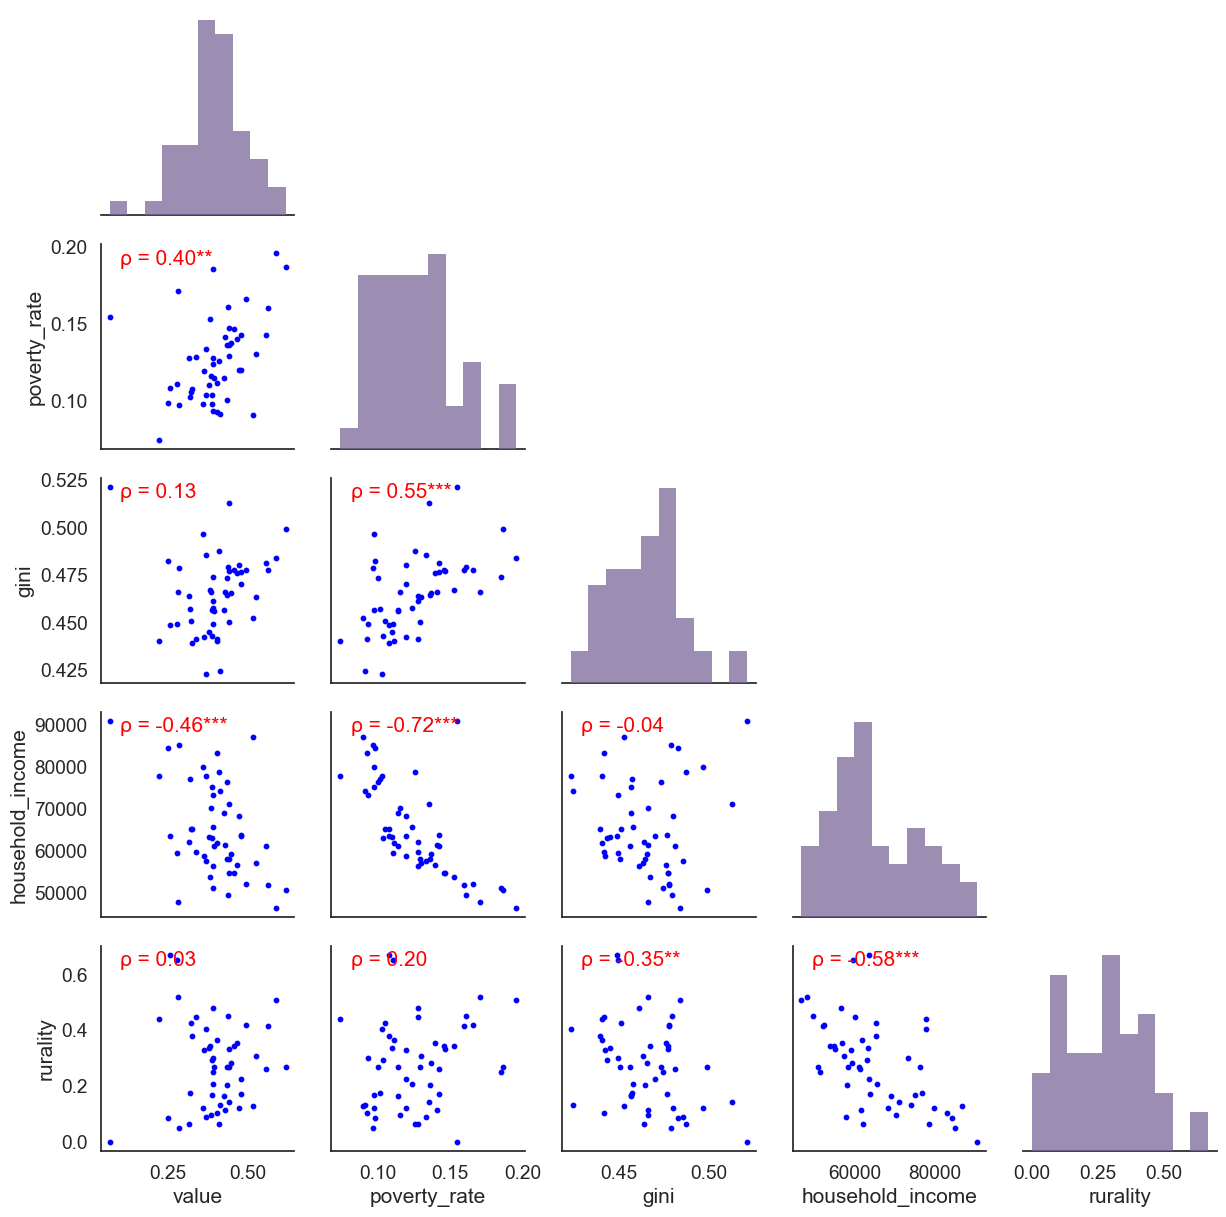

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.25, style="white")

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    note = ""
    if _ < 0.001:
        note = "***"
    elif _ < 0.05:
        note = "**"
    elif _ < 0.1:
        note = "*"

    ax.annotate(
        "ρ = {:.2f}{}".format(r, note),
        xy=(.1, .9), 
        color="red", 
        xycoords=ax.transAxes
    )

dd = data[["value", "poverty_rate", "gini", "household_income", "rurality"]]
dd = dd.rename(columns={
    "value": "Election Polarization",
    "poverty_rate": "Poverty",
    "gini": "Wage Gini",
    "household_income": "Household Income",
    "rurality": "Rural Population"
})
g = sns.PairGrid(dd, diag_sharey=False, corner=True)
g.map_diag(sns.histplot, kde=False, lw=0, bins=10, color="#7B699A")
# g.map_lower(sns.kdeplot, color="#362B48")
g.map_lower(plt.scatter, color="blue", s=10)

g.map_lower(corrfunc)

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'Poverty'),
  Text(0, 1.5, 'Wage Gini'),
  Text(0, 2.5, 'Household Income'),
  Text(0, 3.5, 'Rural Population')])

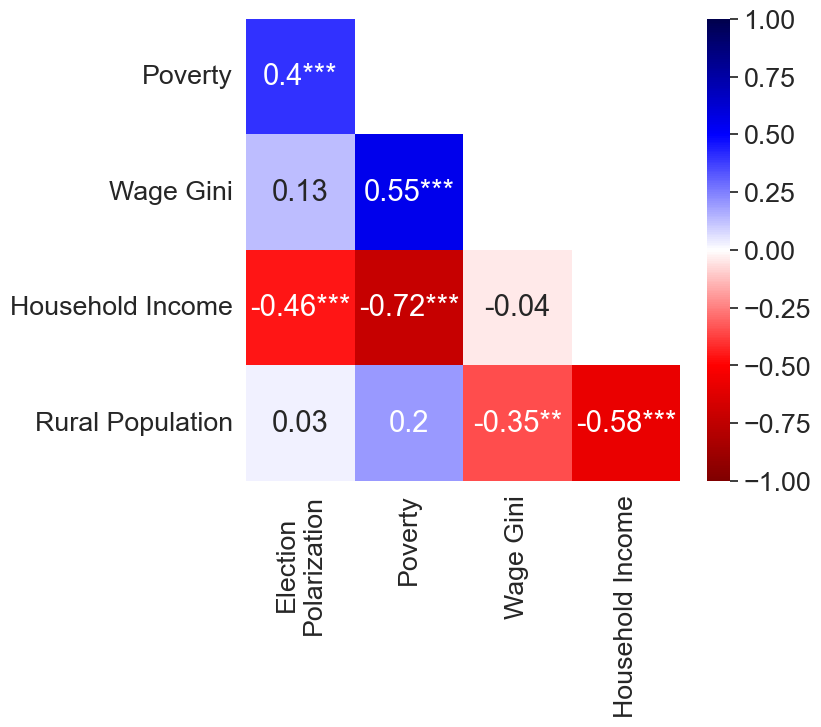

In [ ]:
def set_corr(corr, _):
    corr = round(corr, 3)
    if _ < 0.01:
        return f"{corr}***"
    elif _ < 0.05:
        return f"{corr}**"
    elif _ < 0.1:
        return f"{corr}*"
    return corr

sns.set_style("whitegrid")
sns.set(font_scale=1.75, style="whitegrid")
matplotlib.rc("axes", edgecolor="#000000")
matplotlib.rcParams['axes.grid'] = True

dd = data[["value", "poverty_rate", "gini", "household_income", "rurality"]]
dd = dd.rename(columns={
    "value": "Election\nPolarization",
    "poverty_rate": "Poverty",
    "gini": "Wage Gini",
    "household_income": "Household Income",
    "rurality": "Rural Population"
})

corr_m = dd.corr()
rho = dd.corr()
pval = dd.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)

p = pval.applymap(lambda x: "".join(["*" for t in [0.01, 0.05, 0.1] if x<=t]))
p = rho.round(2).astype(str) + p

p = np.tril(p.values, k=-1)

p[p==0] = np.nan
p = pd.DataFrame(p).dropna(axis=0, how="all").dropna(axis=1, how="all")

labels_m = list(corr_m)
corr_m = np.tril(corr_m.values, k=-1)

corr_m[corr_m==0] = np.nan

fig, ax = plt.subplots(figsize=(7, 6))

heatmap_data = pd.DataFrame(corr_m, index=labels_m, columns=labels_m).round(2)\
                .dropna(axis=0, how="all")\
                .dropna(axis=1, how="all")

g = sns.heatmap(heatmap_data, vmin=-1, vmax=1, annot=p, ax=ax, cmap="seismic_r", fmt="", cbar=True)

g.set_ylim(heatmap_data.shape[0], 0)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

In [ ]:
data = pd.merge(
    df_poverty,
    df_dv,
    on=["state", "year"]
)

data = pd.merge(
    data,
    df_income,
    on=["state", "year"]
)

data = pd.merge(
    data,
    df_inequality,
    on=["state", "year"]
)
data

,year,state,poverty_rate,value,household_income,gini
0,2016,MISSISSIPPI,0.223136,0.605932,40528,0.4799
1,2016,NEW MEXICO,0.209016,0.425512,45674,0.4754
2,2016,LOUISIANA,0.197042,0.641281,45652,0.4903
3,2020,MISSISSIPPI,0.195777,0.588894,46511,0.4838
4,2016,ARKANSAS,0.188252,0.440118,42336,0.4708
...,...,...,...,...,...,...
97,2020,HAWAII,0.092627,0.404448,83173,0.4414
98,2020,UTAH,0.091346,0.412541,74197,0.4245
99,2020,MARYLAND,0.090173,0.515776,87063,0.4526
100,2016,NEW HAMPSHIRE,0.085333,0.223578,68485,0.4344


In [ ]:
data.to_csv("data_regressions/factors_usa.csv", index=False)